In [1]:
# load libraries
import pandas as pd
import numpy as np
import rasterio
import rasterio.plot
from rasterio.plot import plotting_extent
import pyproj
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from glob import glob
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import os

# print current working directory
os.getcwd()

'/Users/chasedawson/dev/uva_equity_center/climate_equity'

In [4]:
folders = ["LC08_L2SP_016034_20200906_20200918_02_T1",
          "LC08_L2SP_016033_20200906_20200918_02_T1",
          "LC08_L2SP_015034_20200713_20200912_02_T1",
          "LC08_L2SP_014034_20200722_20200911_02_T1"]

paths = []
for folder in folders:
    path = os.path.join(
        "bulk_orders",
        "Bulk Order Landsat 8 C2 L2",
        "Landsat 8 OLI_TIRS C2 L2",
        folder,
        folder + "_ST_B10.tif"
    )
    paths.append(path)
    
paths

['bulk_orders/Bulk Order Landsat 8 C2 L2/Landsat 8 OLI_TIRS C2 L2/LC08_L2SP_016034_20200906_20200918_02_T1/LC08_L2SP_016034_20200906_20200918_02_T1_ST_B10.tif',
 'bulk_orders/Bulk Order Landsat 8 C2 L2/Landsat 8 OLI_TIRS C2 L2/LC08_L2SP_016033_20200906_20200918_02_T1/LC08_L2SP_016033_20200906_20200918_02_T1_ST_B10.tif',
 'bulk_orders/Bulk Order Landsat 8 C2 L2/Landsat 8 OLI_TIRS C2 L2/LC08_L2SP_015034_20200713_20200912_02_T1/LC08_L2SP_015034_20200713_20200912_02_T1_ST_B10.tif',
 'bulk_orders/Bulk Order Landsat 8 C2 L2/Landsat 8 OLI_TIRS C2 L2/LC08_L2SP_014034_20200722_20200911_02_T1/LC08_L2SP_014034_20200722_20200911_02_T1_ST_B10.tif']

In [5]:
st_data = []
src_list = []

for st_path in paths:
    with rasterio.open(st_path) as src:
        # add src to src_list
        src_list.append(src)
        
        # read data and append to st_data
        st_data.append(src.read())

In [6]:
# read in us states geometries
states = gpd.read_file('cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


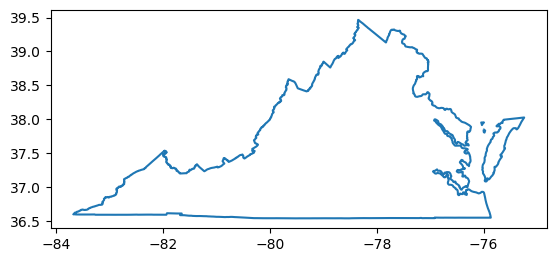

In [8]:
# filter va
va = states[states.STUSPS == "VA"]
va.boundary.plot()
plt.show()

In [14]:
# NOTE: crs of landsat 8 data is not always the same!
for src in src_list:
    print(src.crs)

EPSG:32617
EPSG:32617
EPSG:32618
EPSG:32618


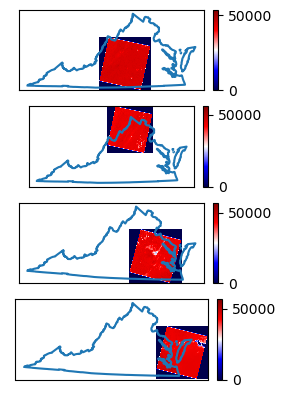

In [12]:
st_data_len = len(st_data)
fig, axs = plt.subplots(st_data_len)
for i in range(st_data_len):
    ep.plot_bands(st_data[i], ax=axs[i], extent=plotting_extent(src_list[i]), cmap="seismic")
    va = va.to_crs(src_list[i].crs) # crs of 
    va.boundary.plot(ax=axs[i])
plt.show()